# Hrant Gharagyozyan

In [4]:
!pip3 install seaborn
!pip install wordcloud

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
df = pd.read_csv("spotify-2023.csv")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

df.info()-ից տեսնում ենք, տվյալների տեսակները ըստ էության ճիշտ են որոշված, բացի **in_shazam_charts, in_deezer_playlists և streams** սյուների, որոնք այս պահին object տիպի են: Սակայն նկատենք, որ **in_shazam_charts**, **key** սյուներում ունենք բացակայող տվյալներ։ 

Փորձենք ազատվել բացակայող արժեքներից:

In [7]:
missing_in_shazam_charts = df['in_shazam_charts'].isnull().sum()
missing_key = df['key'].isnull().sum()

print(missing_in_shazam_charts)
print( missing_key)

50
95


In [8]:
df = df[pd.to_numeric(df['streams'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['in_deezer_playlists'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['in_shazam_charts'], errors='coerce').notnull()]

df['streams'] = pd.to_numeric(df['streams'])
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'])

In [9]:
df = df.dropna(subset=['key'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            748 non-null    object
 1   artist(s)_name        748 non-null    object
 2   artist_count          748 non-null    int64 
 3   released_year         748 non-null    int64 
 4   released_month        748 non-null    int64 
 5   released_day          748 non-null    int64 
 6   in_spotify_playlists  748 non-null    int64 
 7   in_spotify_charts     748 non-null    int64 
 8   streams               748 non-null    int64 
 9   in_apple_playlists    748 non-null    int64 
 10  in_apple_charts       748 non-null    int64 
 11  in_deezer_playlists   748 non-null    int64 
 12  in_deezer_charts      748 non-null    int64 
 13  in_shazam_charts      748 non-null    int64 
 14  bpm                   748 non-null    int64 
 15  key                   748 non-null    ob

Այժմ չունենք null կամ nan արժեքներ։ Դիտարկենք նկարագրական աղյուսակը և փորձենք նախնական պատկերացում կազմել նտվյալների մասին։

In [10]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,7.480000e+02,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,1.584225,2019.462567,6.153743,13.947861,3065.844920,10.875668,3.675354e+08,48.965241,46.905080,93.549465,2.368984,48.909091,123.143048,67.592246,51.129679,64.137701,26.700535,1.681818,18.304813,10.711230
std,0.893000,10.248581,3.513470,9.110284,3715.184068,17.915667,3.639181e+08,57.452117,48.617958,155.906011,5.316258,124.329225,28.333491,14.585603,23.607864,15.933631,25.190809,8.838448,13.722069,10.332208
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,6.000000,792.500000,0.000000,1.263808e+08,11.000000,6.000000,12.000000,0.000000,0.000000,100.000000,58.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,1785.500000,2.000000,2.408440e+08,27.000000,29.000000,32.000000,0.000000,2.000000,121.000000,70.000000,51.000000,65.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,10.000000,22.000000,3771.500000,15.000000,4.809446e+08,67.000000,79.250000,99.000000,1.000000,33.000000,142.000000,79.000000,70.000000,76.000000,41.250000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,29499.000000,147.000000,2.808097e+09,492.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Նախ նկատենք, որ instrumentalness_%, in_deezer_charts և in_deezer_charts փոփոխականների դեպքում մի շարք նկարագրական ցուցանիշներ 0-ի են հավասար։ 

Դա կարող է լինել այն պատճառով, որ այդ փոփոխականները ունենք մեծ քանակությամբ 0 արժեքներ։ Ստուգենք այդ վարկածը։

In [11]:
count_zero_instrumentalness = (df["instrumentalness_%"] == 0).sum()

print("Count of rows where instrumentalness_% is equal to 0:", count_zero_instrumentalness)

Count of rows where instrumentalness_% is equal to 0: 677


In [12]:
count_zero_in_deezer_charts = (df["in_deezer_charts"] == 0).sum()

print("Count of rows where in_deezer_charts is equal to 0:", count_zero_in_deezer_charts)

Count of rows where in_deezer_charts is equal to 0: 458


In [13]:
count_zero_in_shazam_charts = (df["in_shazam_charts"] == 0).sum()

print("Count of rows where in_shazam_charts is equal to 0:", count_zero_in_shazam_charts)

Count of rows where in_shazam_charts is equal to 0: 289


Վարկածը ճիշտ էր, այս փոփոխականները այնքան էլ ինֆորմատիվ չեն, այդ պատճառով վիզուալիզացիաների և հետագա վերլուծությունների համար դրանք չենք դիտարկի։

Այժմ df աղյուսակից ստեղծենք նոր աղյուսակ, որտեղ կլինեն միայն այն փոփոխականները, որոնց հետ մենք ցանկանում ենք աշխատել։

Առանձնացրել եմ մի քանի փոփոխական, որոնք ըստ իս առավել հետաքրքրական են վերլուծության և վիզուալիզացիայի տեսանկյունից։
Դրանք են․ track_name, artist(s)_name, artist_count, released_year, streams, bpm, key, mode, danceability_%, valence_%, energy_%, speechiness_%

In [14]:
selected_columns = ['track_name', 'artist(s)_name', 'artist_count', 
                    'released_year', 'streams', 'key', 'bpm', 'mode', 
                    'danceability_%', 'valence_%', 'energy_%', 'speechiness_%']

spotify = df[selected_columns].copy()
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,streams,key,bpm,mode,danceability_%,valence_%,energy_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,141381703,B,125,Major,80,89,83,4
1,LALA,Myke Towers,1,2023,133716286,C#,92,Major,71,61,74,4
2,vampire,Olivia Rodrigo,1,2023,140003974,F,138,Major,51,32,53,6
3,Cruel Summer,Taylor Swift,1,2019,800840817,A,170,Major,55,58,72,15
4,WHERE SHE GOES,Bad Bunny,1,2023,303236322,A,144,Minor,65,23,80,6


Այս աղյուսակում ավելացնենք նոր սյուն՝ harmony, որն իրենից ընդամենը ներկայացնում է key և mode սյուների կոնկատենացիան։

In [15]:
spotify['harmony'] = spotify['key'].astype(str) + ' ' + spotify['mode']
spotify['streams_milion'] = (spotify['streams']/1000000).astype(int)     # վիզուալիզացիայի համար միայն
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,streams,key,bpm,mode,danceability_%,valence_%,energy_%,speechiness_%,harmony,streams_milion
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,141381703,B,125,Major,80,89,83,4,B Major,141
1,LALA,Myke Towers,1,2023,133716286,C#,92,Major,71,61,74,4,C# Major,133
2,vampire,Olivia Rodrigo,1,2023,140003974,F,138,Major,51,32,53,6,F Major,140
3,Cruel Summer,Taylor Swift,1,2019,800840817,A,170,Major,55,58,72,15,A Major,800
4,WHERE SHE GOES,Bad Bunny,1,2023,303236322,A,144,Minor,65,23,80,6,A Minor,303


In [16]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 952
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   track_name      748 non-null    object
 1   artist(s)_name  748 non-null    object
 2   artist_count    748 non-null    int64 
 3   released_year   748 non-null    int64 
 4   streams         748 non-null    int64 
 5   key             748 non-null    object
 6   bpm             748 non-null    int64 
 7   mode            748 non-null    object
 8   danceability_%  748 non-null    int64 
 9   valence_%       748 non-null    int64 
 10  energy_%        748 non-null    int64 
 11  speechiness_%   748 non-null    int64 
 12  harmony         748 non-null    object
 13  streams_milion  748 non-null    int32 
dtypes: int32(1), int64(8), object(5)
memory usage: 84.7+ KB


Այս աշխատանքի շրջանակներում **ոչ մի** փոփոխականի համար **OUTLIER-ները չեն հեռացվելու** և նույնիսկ ստուգվելու, նախ քանի որ ռեգրեսիոն անալիզ չի կիրառվելու, և երկրորդ՝ փոփոխականները էմպիրիկ, փաստացի տվյալներ են, և այստեղ դրանք ունեն կոնկրետ իմաստ և նշանակություն։

Փորձենք տեսնել, թե որ հարմոնիայով ստեղծագործություներն են ավելի շատ լսել spotify-ի օգտատերերը։

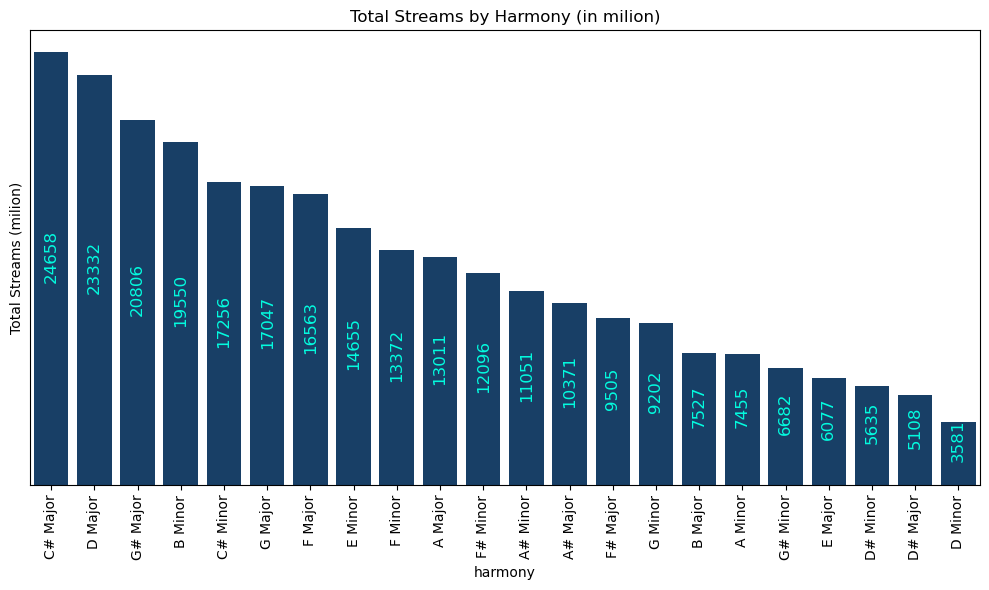

In [17]:
streams_by_harmony = spotify.groupby('harmony')['streams_milion'].sum().reset_index().sort_values(by='streams_milion', ascending=False)

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='harmony', y='streams_milion', data=streams_by_harmony, color="#0b3f73")
plt.title('Total Streams by Harmony (in milion)')
plt.ylabel('Total Streams (milion)')
plt.xticks(rotation=90)
plt.yticks([])
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()/2), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points',
                   rotation=90,
                   color='#03fcdf',
                   fontsize=12)
plt.tight_layout()
plt.show()

Ինչպես տեսնում ենք լավագույն եռյակում մաժորային հարմոնիաներ են միայն՝
- Դո դիեզ մաժոր
- Ռե մաժոր
- Սոլ դիեզ մաժոր

Առաջանում է վարկած, որ մաժորային ստեղծագործություններն ավելի մեծ լսարան ունեն։ Ստուգենք․․․

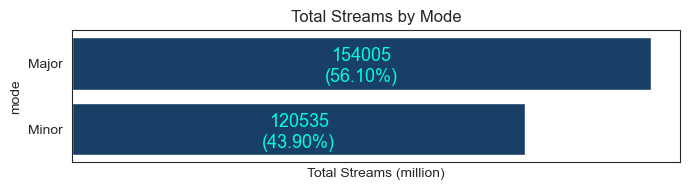

In [43]:
streams_by_mode = spotify.groupby('mode')['streams_milion'].sum().reset_index().sort_values(by='streams_milion', ascending=False)

plt.figure(figsize=(7, 2))
ax1 = sns.barplot(y='mode', x='streams_milion', data=streams_by_mode, color="#0b3f73")
plt.title('Total Streams by Mode')
plt.xlabel('Total Streams (million)')
plt.xticks([])
plt.yticks(rotation=0)

for p in ax1.patches:
    ax1.annotate(f"{format(p.get_width(), '.0f')}", 
                   (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()/2), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   color='#03fcdf',
                   fontsize=13)
    percentage = p.get_width() / streams_by_mode['streams_milion'].sum() * 100
    ax1.annotate(f"({percentage:.2f}%)", 
                   (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()/2), 
                   ha='center', va='center', 
                   xytext=(0, -10), 
                   textcoords='offset points',
                   color='#03fcdf',
                   fontsize=13)

plt.tight_layout()
plt.show()


Այո, մաժորային հարմոնիայով երգերը ավելի մեծ լսումներ են ապահովել։

Այժմ ստուգենք՝ արդյոք կա որևե գծային կամ ոչ գծային կամ երգի արագության (bpm - beats per minute) և լսումների քանակի միջև

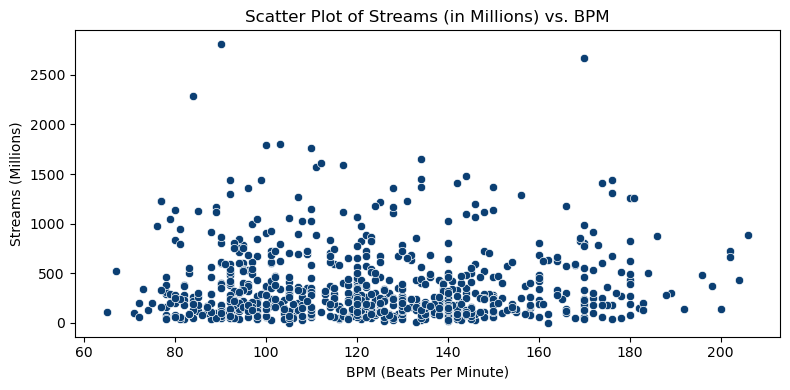

In [19]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='bpm', y='streams_milion', data=spotify, color="#0b3f73")
plt.title('Scatter Plot of Streams (in Millions) vs. BPM')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Streams (Millions)')
plt.tight_layout()
plt.show()

Scatterplot-ից երևում է, որ չկա խիստ արտահայտված կապ այդ 2 փոփոխականների միջև

Փորձենք հասկանալ նաև՝ կա արդյոք արտահայտված կապ 'danceability_%', 'valence_%', 'energy_%', 'speechiness_%' և 'streams' փոփոխականների միջև

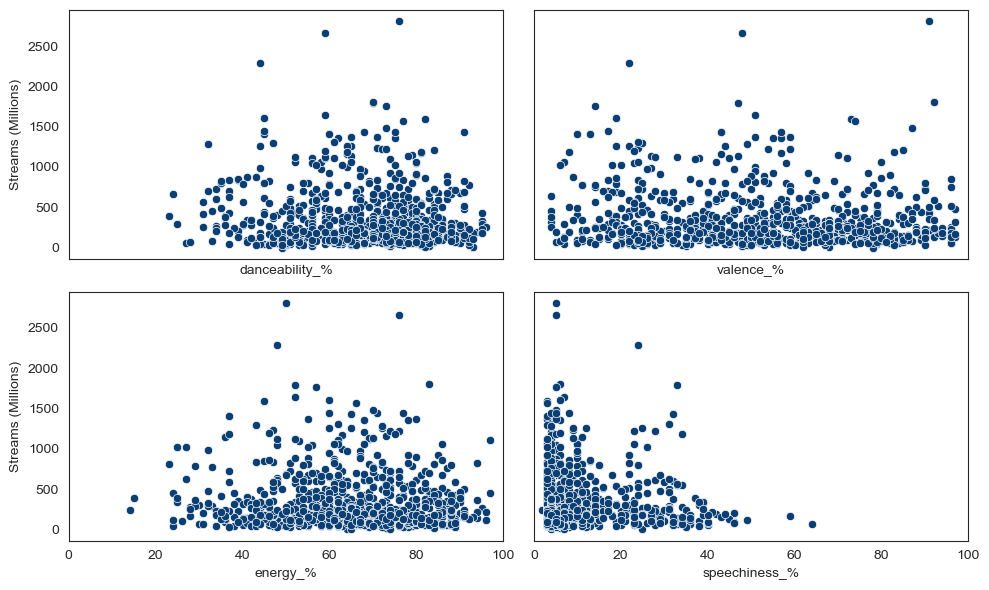

In [50]:
columns = ['danceability_%', 'valence_%', 'energy_%', 'speechiness_%']

plt.figure(figsize=(10, 6))
for i, col in enumerate(columns, 1):
    ax = plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y='streams_milion', data=spotify, color='#0b3f73')
    plt.xlabel(col)
    plt.ylabel('Streams (Millions)')
    ax.set_xlim(0, 100)
    if i > 2:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels())
    else:
        plt.xticks([])
    if i % 2 != 0:
        plt.ylabel('Streams (Millions)')
        plt.yticks()
    else:
        plt.ylabel('')
        plt.yticks([])

plt.tight_layout()
plt.show()

Այս չորս scatterplot-ներից միայն 4-րդում (speechiness_%) կարող ենք վիզուալ հստակ կապ տեսնել, համաձայն որի, որքան speechiness_%-ը փոքր է, այնքան ավելի շատ լսումներ է ապահովել տվյալ երգը։ Այլ կեր ասած, այն ստեղծագործությունները, որոնցում բառերը, խոսքերը շատ էն (օրինակ ռեպ ժանրում), ավելի քիչ գրավիչ են եղել spotify օգտատերերի համար։

Նկատենք նաև, որ danceability_% և 'energy_%' փոփոխականների կապը լսումների քանակի հետ, գուցե միայն զուտ վիզուալ առումով, սակայն շատ նման են։ Եվ դա կարծում եմ տրամաբանական է, քանի որ որքան մեծ ստեղծագործության էներգիան (որն իմիջիայլոց չափվում է դեցիբելներով), այնքան ավելի պարային կամ "պարեցնող" է այն։ Եկեք ստունգենք նաև այս վարկածը։

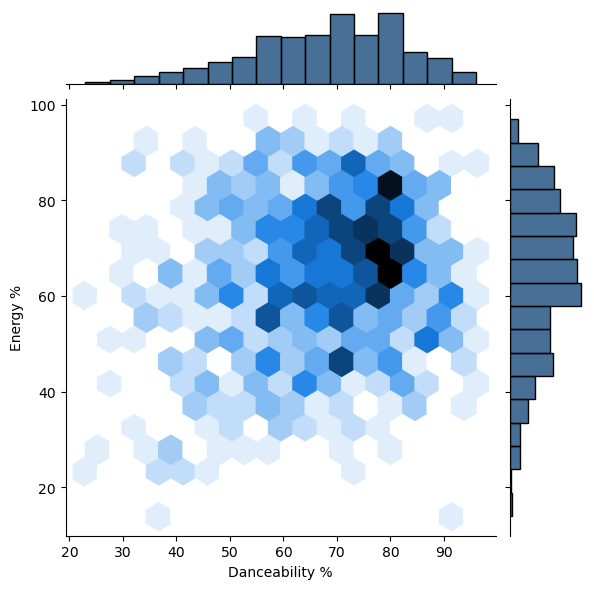

In [21]:
sns.jointplot(x='danceability_%', y='energy_%', data=spotify, kind='hex', color='#0b3f73')
plt.xlabel('Danceability %')
plt.ylabel('Energy %')
plt.show()

Այս վարկածը նույնպես ճշմարտանման է, քանի որ jointplot-ից երևում է, որ կա դրական կապ այս երկու ցուցանիշների միջև։

Հետաքրքրական է նաև, արդյոք արտիստների քանակը որևէ կերպ կարող է ազդել լսումների քանակի վրա։ Այդ պարզելու համար, օգտվենք swarmplot-ից։

C:\Users\Asus Vivobook\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus Vivobook\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus Vivobook\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus Vivobook\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus Vivobook\anaconda3\Lib\site-packages\seaborn\categorical.py

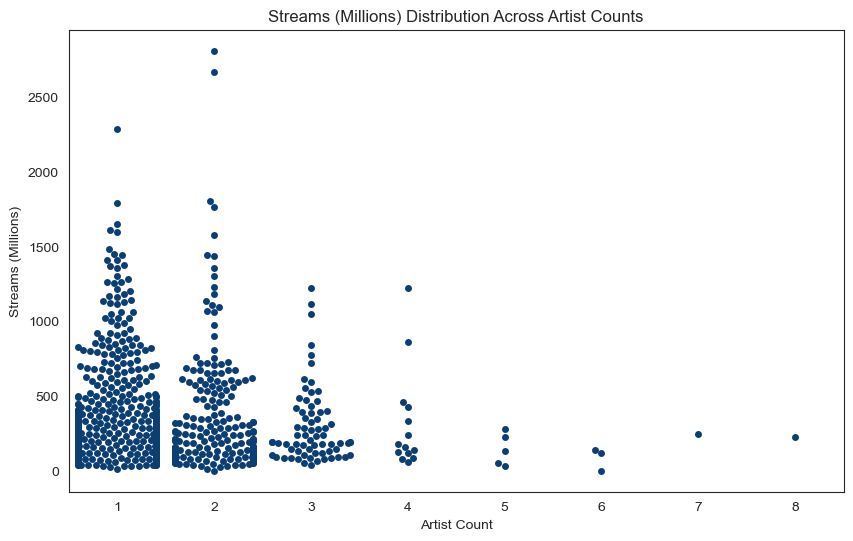

In [22]:
sns.set_style("white")
plt.figure(figsize=(10, 6))
sns.swarmplot(x='artist_count', y='streams_milion', data=spotify, color='#0b3f73')
plt.xlabel('Artist Count')
plt.ylabel('Streams (Millions)')
plt.title('Streams (Millions) Distribution Across Artist Counts')
plt.show()

Այս վիզուալիզացիայից կարելի է առնվազն 2 ակնհայտ փաստ արձանագրել․

- նախ անհամեմատ առավել շատ են այն ստեղծագործությունները, որոնցում արտիստների թիվը չի գերազանցում 2-ը
- երկրորդ, որքան շատ արտիստներ են ներգրավված տվյալ երգի կամ երաժշտության մեջ, այնքան ավելի քիչ են լսումները։

Սա իհարկե տրամաբանական է։ Պատկերացնենք 2 երգ, որոնցից 1-ինում 8 արտիստ է ներգրավված, 2-րդում՝ 1 արտիստ։ Հասկանալի է, որ առաջին երգի վերնագիրը արտիստների անունների հետ միասին շատ ավելի երկար է, քան երկրորդ երգինը։ Զուտ վիզուալ և նաև հոգեբանական տեսանկյունից, օգտատերերը ավելի հակված կլինեն միացնել կարճ անվանում ունեցող երգը, քանի որ այն ավելի հեշտ ընկալելի է։

Հետաքրքիր կլինի նաև դիտարկել ստեղծագործության լսումների քանակի և նրա անվանման սենտիմենտի միջև կապը։ Այդ նխատակով, կօգտվենք vader-ի սենտիմենտ անալիզի համար նախատեսված բառարանից։

Ստորև կատարել ենք սենտիմենտ անալիզ, և "compound" սյունը ավելացրել մեր աղյուսակում։ Այն ցույց է տալիս, թե որքան դրական կամ բացասական սենտիմենտ ունի ստեղծագործության անվանումը։ Արժեքները ընդունում է [-1, 1] միջակայքում։

In [23]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_compound_score(track_name):
    # Calculate sentiment score
    scores = sid.polarity_scores(track_name)
    return scores['compound']

spotify['compound'] = spotify['track_name'].apply(get_compound_score)

[nltk_data] Downloading package vader_lexicon to C:\Users\Asus
[nltk_data]     Vivobook\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Վերցնենք 0 thrashold։ 0-ից մեծ արժեք ունեցողները կդասակարգվեն դրական, փոքրերը բացասական սենտիմենտ, իսկ 0-ին հավասար compound ունեցողները՝ չեզոք։

In [24]:
def get_sentiment(track_name):
    scores = sid.polarity_scores(track_name)

    if scores['compound'] > 0:
        return 'Positive'
    elif scores['compound'] < 0 :
        return 'Negative'
    else:
        return 'Neutral'

spotify['sentiment'] = spotify['track_name'].apply(get_sentiment)
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,streams,key,bpm,mode,danceability_%,valence_%,energy_%,speechiness_%,harmony,streams_milion,compound,sentiment
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,141381703,B,125,Major,80,89,83,4,B Major,141,0.0000,Neutral
1,LALA,Myke Towers,1,2023,133716286,C#,92,Major,71,61,74,4,C# Major,133,0.0000,Neutral
2,vampire,Olivia Rodrigo,1,2023,140003974,F,138,Major,51,32,53,6,F Major,140,0.0000,Neutral
3,Cruel Summer,Taylor Swift,1,2019,800840817,A,170,Major,55,58,72,15,A Major,800,-0.5859,Negative
4,WHERE SHE GOES,Bad Bunny,1,2023,303236322,A,144,Minor,65,23,80,6,A Minor,303,0.0000,Neutral


In [25]:
spotify['sentiment'].value_counts()

Neutral     575
Positive     99
Negative     74
Name: sentiment, dtype: int64

Հարց է առաջանում, արդյոք սենտիմենտի արժեքը (compound) և լսումների քանակը կոռելացված են միմյանց հետ։

<Figure size 1000x800 with 0 Axes>

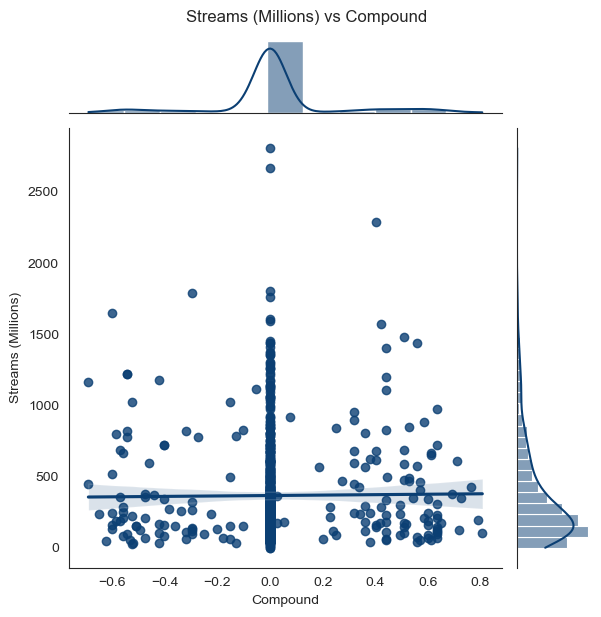

In [51]:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.jointplot(x='compound', y='streams_milion', data=spotify, kind='reg', color='#0b3f73')
plt.xlabel('Compound')
plt.ylabel('Streams (Millions)')
plt.suptitle('Streams (Millions) vs Compound', y=1.02)
plt.show()

Վիզուալ որևէ կապ չի նկատվում, ռեգրեսիայի գիծը գրեթե հորիզոնական է։ Նկատենք նաև որ մեծ քանակությամբ չեզոք սենտիմետ ունեցող ստեղծագործություններ կան։

Այժմ փորձենք հասկանալ, թե միջինում որքան լսումներ են ապահովել սենտիմենտի տեսակները։

In [27]:
neutral_count = int(spotify[spotify["sentiment"] == "Neutral"]["sentiment"].value_counts())
positive_count = int(spotify[spotify["sentiment"] == "Positive"]["sentiment"].value_counts())
negative_count = int(spotify[spotify["sentiment"] == "Negative"]["sentiment"].value_counts())

neutral_streams = spotify[spotify["sentiment"] == "Neutral"]["streams_milion"].sum()
positive_streams = spotify[spotify["sentiment"] == "Positive"]["streams_milion"].sum()
negative_streams = spotify[spotify["sentiment"] == "Negative"]["streams_milion"].sum()

streams_per_neutral = round(neutral_streams / neutral_count)
streams_per_positive = round(positive_streams / positive_count)
streams_per_negative = round(negative_streams / negative_count)

print(f"Streams per neutral (milion): {streams_per_neutral}")
print(f"Streams per positive (milion): {streams_per_positive}")
print(f"Streams per negative (milion): {streams_per_negative}")

Streams per neutral (milion): 351
Streams per positive (milion): 427
Streams per negative (milion): 409


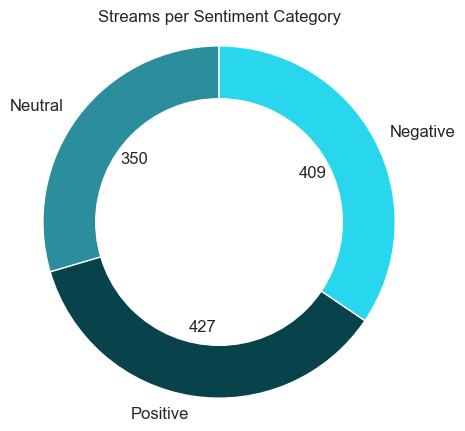

In [28]:
sentiments = ['Neutral', 'Positive', 'Negative']
streams_per_sentiment = [streams_per_neutral, streams_per_positive, streams_per_negative]

colors = ['#2c8e9c', '#08424a', '#28d6ed']

plt.figure(figsize=(5, 5))
plt.pie(streams_per_sentiment, labels=sentiments, colors=colors, 
        autopct=lambda x: f'{int(x * sum(streams_per_sentiment) / 100)}', startangle=90, textprops={'fontsize': 12})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  
plt.title('Streams per Sentiment Category')
plt.show()

- Չեզոք սենտիմենտ ունեցող 1 ստեղծագործությունը միջինում ապահովել է 351 միլիոն լսումների քանակ,
- դրական սենտիմենտը՝ 427 միլիոն,
- բացասականը՝ 409 միլիոն։

Ստեղծենք նաև word cloud` ըստ արտիստների անունների։

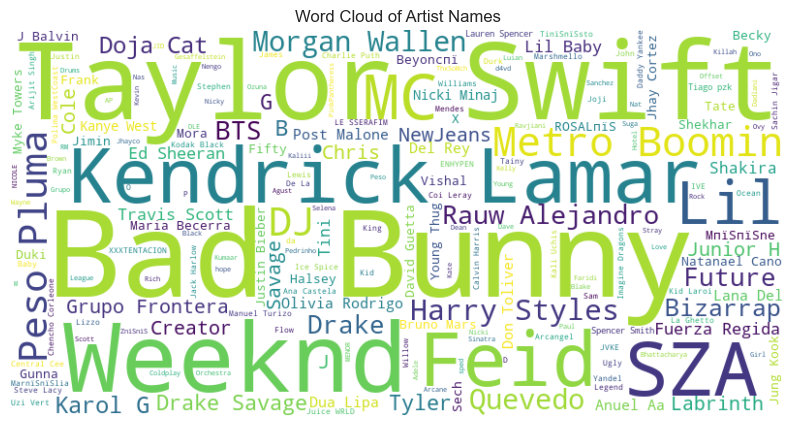

In [40]:
all_artists = ' '.join(artist_name for artist_name in spotify['artist(s)_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_artists)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Artist Names')
plt.show()